In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model
import os

In [ ]:
!git clone https://github.com/BasilKhan07/FYP-2023.git

Cloning into 'FYP-2023'...
remote: Enumerating objects: 10203, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10203 (delta 0), reused 11 (delta 0), pack-reused 10191
Receiving objects: 100% (10203/10203), 1.59 GiB | 14.07 MiB/s, done.
Updating files: 100% (10155/10155), done.


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = r'/content/FYP-2023/Dataset/Train'
valid_path = r'/content/FYP-2023/Dataset/Test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob(r'/content/FYP-2023/Dataset/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model_IV3_final = Model(inputs=inception.input, outputs=prediction)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# tell the model what cost and optimization method to use
model_IV3_final.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
model_IV3_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 8145 images belonging to 19 classes.
Found 2010 images belonging to 19 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
history_IV3_final = model_IV3_final.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

model_IV3_final.save('InceptionV3_Final_Model.h5')
print("model saved to Disk.")

Epoch 1/10
255/255 [==============================] - 1354s 5s/step - loss: 3.4468 - accuracy: 0.7575 - val_loss: 2.5932 - val_accuracy: 0.8507
Epoch 2/10
255/255 [==============================] - 1350s 5s/step - loss: 1.8184 - accuracy: 0.8695 - val_loss: 1.4976 - val_accuracy: 0.8915
Epoch 3/10
255/255 [==============================] - 1348s 5s/step - loss: 1.5315 - accuracy: 0.8981 - val_loss: 1.4170 - val_accuracy: 0.9055
Epoch 4/10
255/255 [==============================] - 1344s 5s/step - loss: 1.3092 - accuracy: 0.9196 - val_loss: 1.4485 - val_accuracy: 0.9144
Epoch 5/10
255/255 [==============================] - 1342s 5s/step - loss: 1.1710 - accuracy: 0.9300 - val_loss: 1.8123 - val_accuracy: 0.9010
Epoch 6/10
255/255 [==============================] - 1342s 5s/step - loss: 1.0228 - accuracy: 0.9423 - val_loss: 1.5075 - val_accuracy: 0.9254
Epoch 7/10
255/255 [==============================] - 1350s 5s/step - loss: 0.9730 - accuracy: 0.9457 - val_loss: 2.0125 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


model saved to Disk.


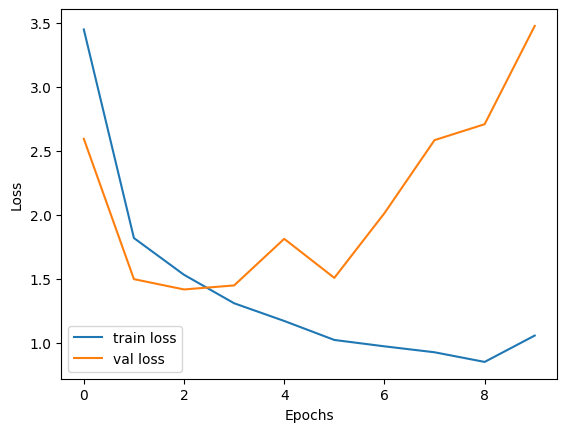

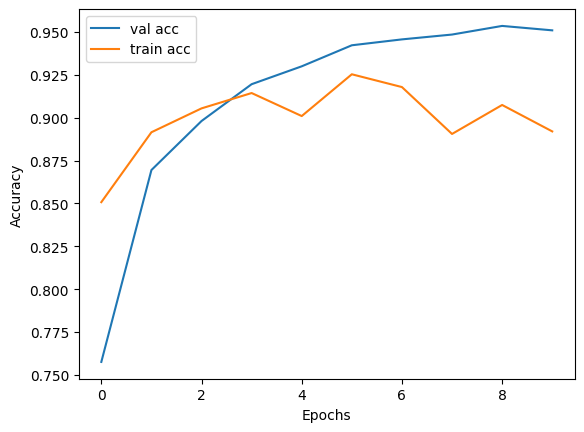

In [ ]:
#plot the loss
plt.plot(history_IV3_final.history['loss'], label='train loss')
plt.plot(history_IV3_final.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot the accuracy
plt.plot(history_IV3_final.history['accuracy'], label='val acc')
plt.plot(history_IV3_final.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# dirname = os.path.join(os.path.dirname(__file__))
model_IV3_new_final = load_model('InceptionV3_Final_Model.h5')
print("model loaded.")

model loaded.


In [ ]:
model_IV3_new_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

Found 2010 images belonging to 19 classes.


In [ ]:
predictions = model_IV3_new_final.predict(test_data_generator, steps=test_steps_per_epoch)

63/63 [==============================] - 256s 4s/step


In [ ]:
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0 ... 18 18 18]
[ 0  0  1 ... 18 18 18]


In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())


In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report)
print(cmat)
print(acc)

                        precision    recall  f1-score   support

          Apple_blotch       0.86      0.39      0.54        64
         Apple_healthy       0.83      0.97      0.89       137
          Apple_rotten       0.92      0.93      0.93       136
            Apple_scab       0.98      0.98      0.98        42
           Banana_firm       1.00      0.89      0.94       148
 Banana_heavilybruised       0.86      0.96      0.91       136
Banana_slightlybruised       0.94      0.92      0.93       159
   GreenChilli_damaged       1.00      0.78      0.88        27
     GreenChilli_dried       1.00      0.96      0.98       100
       GreenChilli_old       1.00      0.73      0.84        52
      GreenChilli_ripe       0.85      0.88      0.86        40
    GreenChilli_unripe       0.66      1.00      0.80        45
       Orange_greening       0.95      0.87      0.91       136
        Orange_healthy       0.89      0.72      0.80        71
         Orange_rotten       0.86      

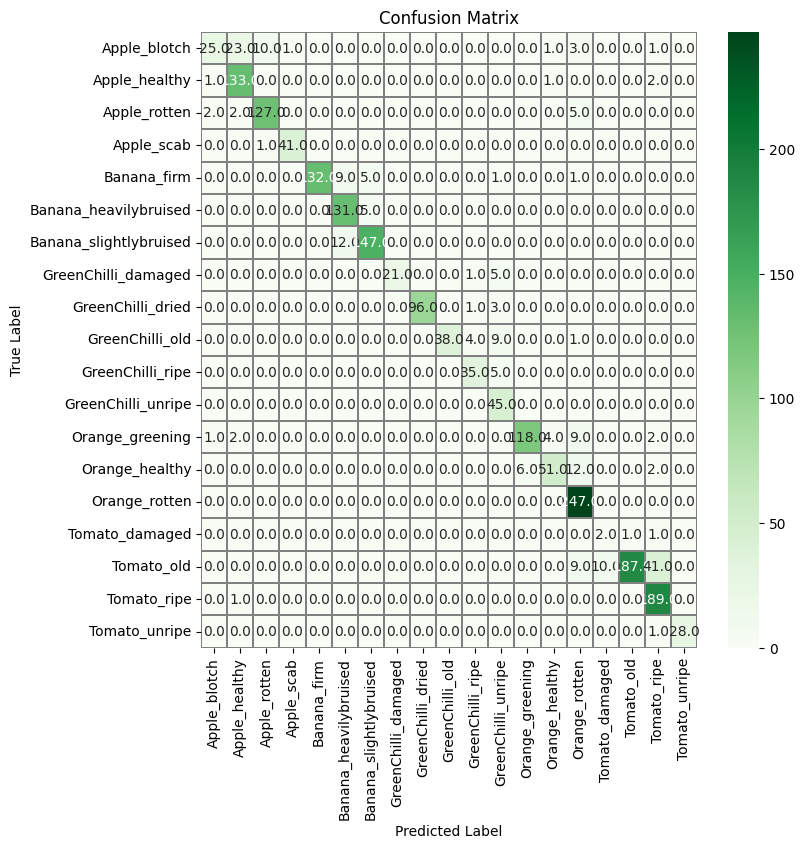

In [ ]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged',
                    'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged',
                    'Tomato_old', 'Tomato_ripe', 'Tomato_unripe'])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged',
                    'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged',
                    'Tomato_old', 'Tomato_ripe', 'Tomato_unripe'])

plt.title("Confusion Matrix")
plt.show()

In [ ]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [ ]:
import pandas as pd
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(confusion_mtx)).transpose()
classes = ['Apple_blotch', 'Apple_healthy', 'Apple_rotten', 'Apple_scab', 'Banana_firm', 'Banana_heavilybruised', 'Banana_slightlybruised', 'GreenChilli_damaged',
           'GreenChilli_dried', 'GreenChilli_old', 'GreenChilli_ripe', 'GreenChilli_unripe', 'Orange_greening', 'Orange_healthy', 'Orange_rotten', 'Tomato_damaged',
            'Tomato_old', 'Tomato_ripe', 'Tomato_unripe']
df['CLASSES'] = classes
df.set_index('CLASSES', inplace=True)
df

,TPR,FNR,FPR,TNR
CLASSES,,,,
Apple_blotch,0.390625,0.609375,0.002055,0.997945
Apple_healthy,0.970803,0.029197,0.014949,0.985051
Apple_rotten,0.933824,0.066176,0.005870,0.994130
Apple_scab,0.976190,0.023810,0.000508,0.999492
Banana_firm,0.891892,0.108108,0.000000,1.000000
Banana_heavilybruised,0.963235,0.036765,0.011206,0.988794
Banana_slightlybruised,0.924528,0.075472,0.005402,0.994598
GreenChilli_damaged,0.777778,0.222222,0.000000,1.000000
GreenChilli_dried,0.960000,0.040000,0.000000,1.000000


In [ ]:
print("InceptionV3 analysis: ")
print("TPR average: ",df["TPR"].mean())
print("FPR average: ",df["FPR"].mean())
print("TNR average: ",df["TNR"].mean())
print("FNR average: ",df["FNR"].mean())

InceptionV3 analysis: 
TPR average:  0.8525231812347136
FPR average:  0.0061447978399601436
TNR average:  0.9938552021600399
FNR average:  0.14747681876528643
